In [1]:
# Import libraries to use 
import numpy as np
import matplotlib.pyplot as plt
import math       
import scipy as sp
import scipy.optimize
import pandas as pd


In [9]:
# Model to fit
def model_y_func(x,a,b):
    y = a*np.exp(-((x*x)/(b*b))) # Whatever function you want
    return y

# Fitting definition 
def fit(x,y,a0,b0): #(a0,b0) are guessed initial values of the fitting constants
    opt_parms, parm_cov = sp.optimize.curve_fit(model_y_func, x, y,(a0,b0)) 
    a,b = opt_parms
    print(opt_parms)
    return a,b # return your fitting constant

[1. 2.]


<IPython.core.display.Javascript object>


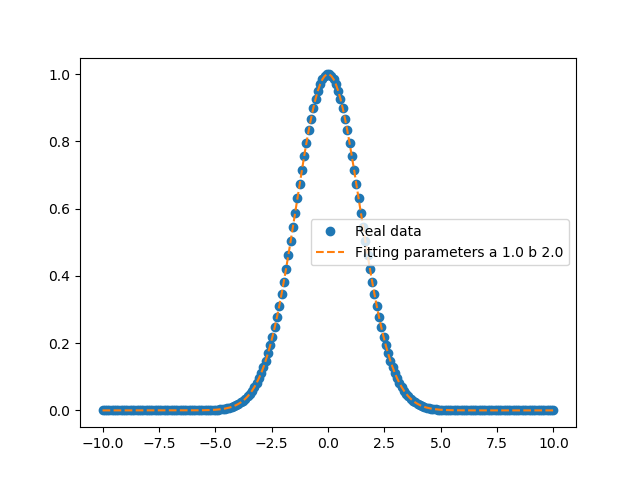

In [11]:
%matplotlib notebook

x = np.linspace(-10,10,200)
y = model_y_func(x,1,2)

a0 = 5
b0 = 10
a,b = fit(x,y,a0,b0)
y_fit = model_y_func(x,a,b)
plt.plot(x,y,'o',label ='Real data')
plt.plot(x,y_fit,'--', label = 'Fitting parameters '+f'a {np.round(a,2)} b {np.round(b,2)}')
plt.legend()

In [12]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#def psatur(x,psat,alpha,beta):
#    return alpha*(x/psat)/(1+x/psat)+beta*x #aqui tenia mi ecuacion fea de saturacion

def gaus(x, a, b, c):
    return a*np.exp(-((x - b)**2)/c**2) 

def residual(p, x, y, yerr):
    return (y -psatur(x, *p))/yerr


def fit_optimize(data,init,residual,ax):
    x=np.array(data['power'].tolist())
    y=np.array(data['crt'].tolist())
    yerr=np.array(data['crt-err'].tolist())
  
    xfit=np.linspace(x[0],x[-1],100)
    yfit=np.array([])
    
    
    popt, pcov,info, message, ier = optimize.leastsq(residual,init,args=(x, y, yerr), full_output=True, factor = 0.1, maxfev=10000)
    
    print(message)
    if (ier==5):
        print('FIT FAILED! Displaying trial curve')
        popt = init
        perr = [0 for k in init]
    else:
        yf = np.array([])
        for xi in x:
            yf=np.append(yf,psatur(xi,*popt))
        chi2 = 0
        for i in range(len(y)):
            chi2=chi2+(y[i]-yf[i])**2/yerr[i]**2
        chi2 = chi2/(len(y)-len(popt))
        print("chi2red=",chi2)
        if chi2>1:
            perr = np.sqrt(np.diag(pcov*chi2)) # we multiply redchi2 into errors
        else: 
            perr = np.sqrt(np.diag(pcov)) # we multiply redchi2 into errors
        print('Resulting fit parameters: ',popt)
        print('With errors: ',perr)
    #plot results
    for x0 in xfit:
        yfit=np.append(yfit,psatur(x0,*popt))

    data.plot(x='power', y='crt',yerr='crt-err',ax=ax,kind='scatter',style='o',c='black')#label = 'result')
    ax.plot(xfit,yfit,color='red') 
    plt.xlabel('Power (mW)',fontsize=12)
    plt.ylabel('Current (pA)',fontsize=12)
    #plt.legend()
    plt.savefig('result.jpg')
    



#%%

initial_parameters=[1,70,4]


plt.close('all')

newdata=pd.read_csv('2nd-step-scan.csv',sep = ';',decimal=",", names=['power','crt'], header=0)
newdata['crt-err'] = newdata['crt']*0.05+0.5
    
fig,ax1 = plt.subplots() 

fit_optimize(newdata,initial_parameters,residual,ax=ax1)

FileNotFoundError: [Errno 2] File b'2nd-step-scan.csv' does not exist: b'2nd-step-scan.csv'